# Downloading the data

Before we can use OpenStreetMap (OSM) data, we have to downmload it. We will do that using [Pyrosm](https://pyrosm.readthedocs.io/en/latest/), a Python library for reading OpenStreetMap from Protocolbuffer Binary Format -files (*.osm.pbf) into Geopandas GeoDataFrames.

Pyrosm provides a function [`get_data()`](https://pyrosm.readthedocs.io/en/latest/basics.html#protobuf-file-what-is-it-and-how-to-get-one) that can be used to download any PBF dataset available at Geofabrik or BBBike to your local machine without the need to go to the website and do this manually.

In [1]:
from pathlib import Path
from pyrosm import get_data

Path("data").mkdir(parents=True, exist_ok=True)
fp = get_data("italy", directory="data")
print("Data was downloaded to:", fp)


Data was downloaded to: C:\Users\ASUS\PycharmProjects\boring-wozniak\data\italy-latest.osm.pbf


Now let's build the OSM object

In [2]:
from pyrosm import OSM

fp = 'C:\\Users\\ASUS\\PycharmProjects\\boring-wozniak\\data\\veneto_mini.pbf'
osm = OSM(fp)

# Road network

## Nodes and Edges

Now we read OSM nodes and edges (ways that connect the nodes)

In [4]:
nodes, edges = osm.get_network(network_type='all', nodes=True)


Now we plot OSM nodes and edges

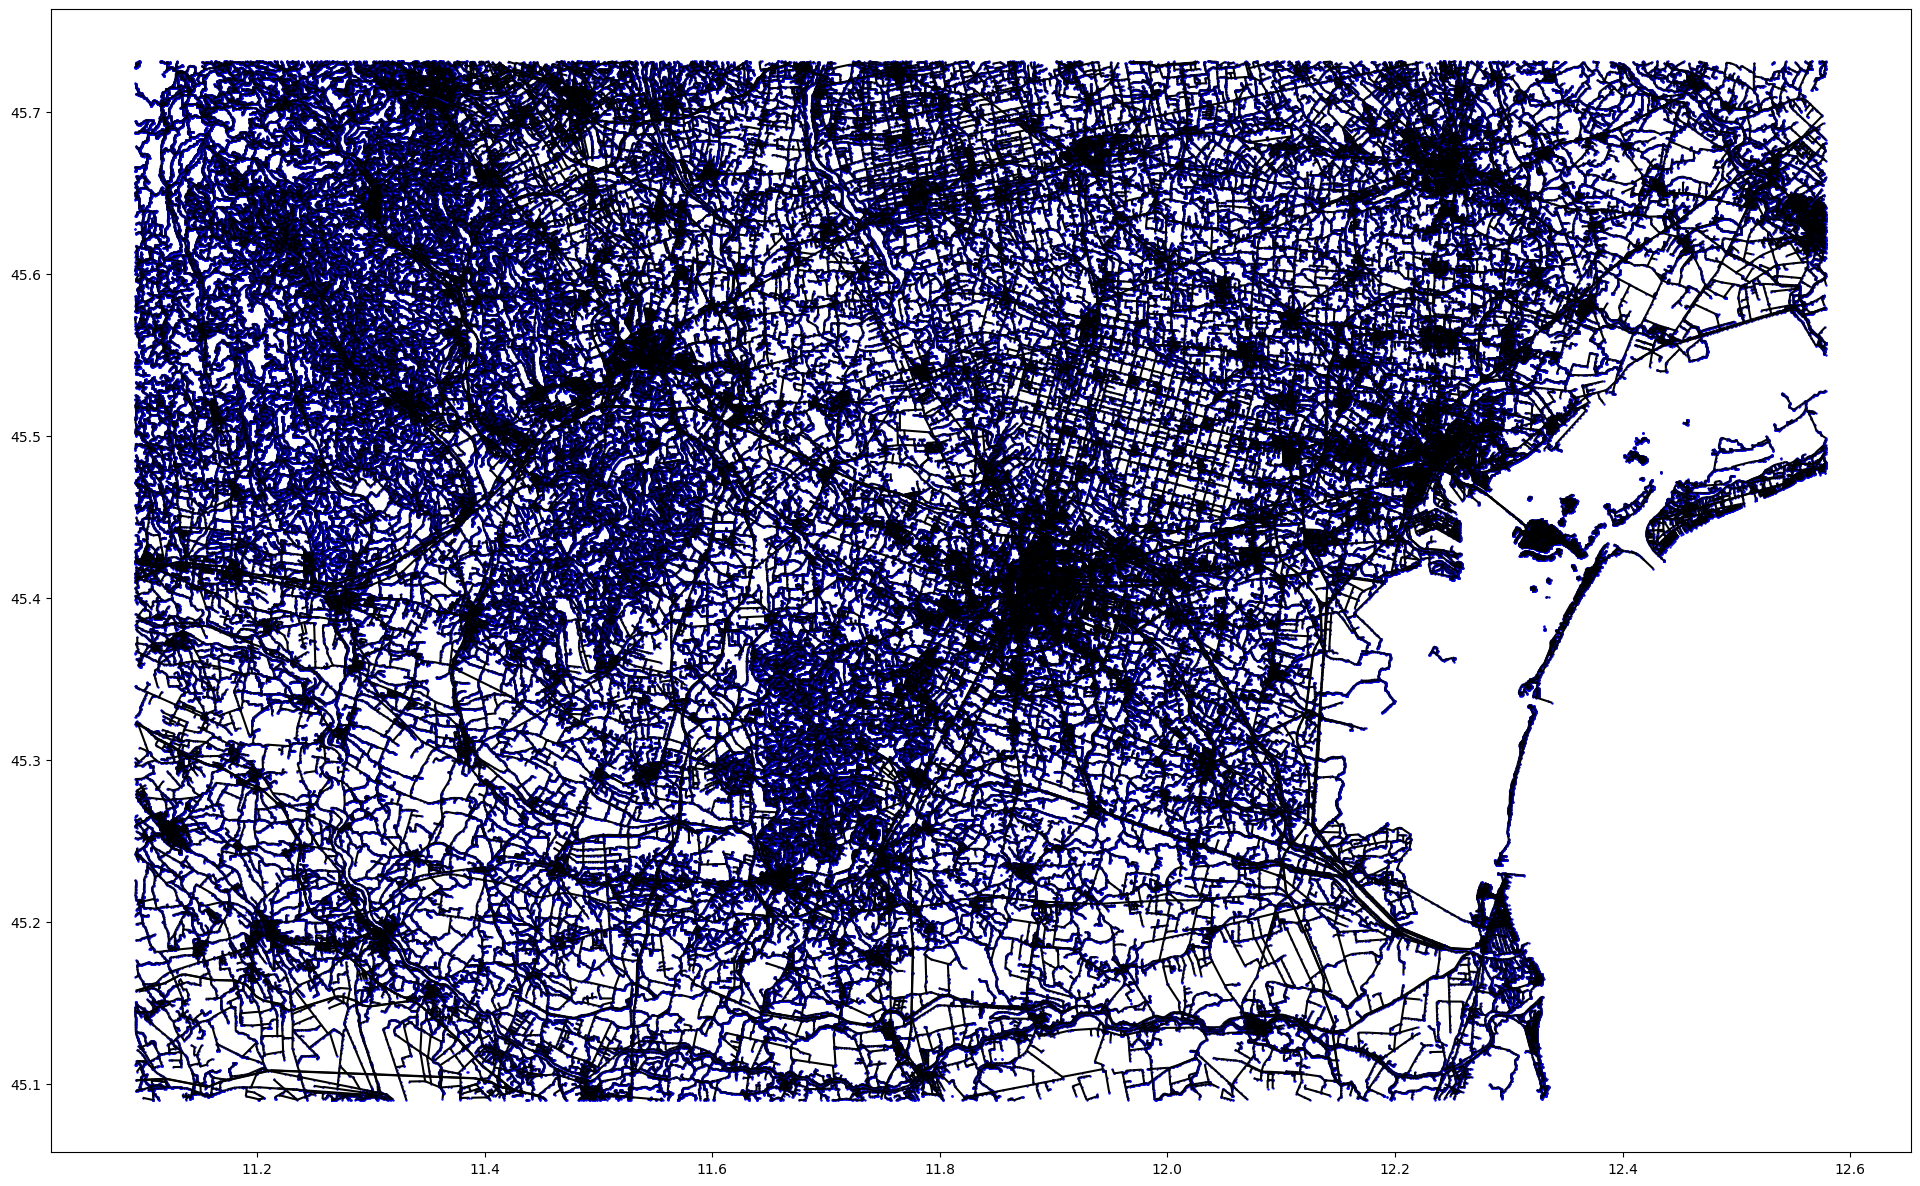

In [22]:
# Plot nodes and edges on a map
ax = edges.plot(figsize=(24,24), color="black")
ax = nodes.plot(ax=ax, color="blue", markersize=0.5)

Let's take a closer look at the edges

In [23]:
edges.head(10)

access  area bicycle bicycle_road bridge busway cycleway est_width  foot  \
0   None  None    None         None   None   None     None      None  None   
1   None  None    None         None   None   None     None      None  None   
2   None  None    None         None   None   None     None      None  None   
3   None  None    None         None   None   None     None      None  None   
4   None  None    None         None   None   None     None      None  None   
5   None  None    None         None   None   None     None      None  None   
6   None  None    None         None   None   None     None      None  None   
7   None  None    None         None   None   None     None      None  None   
8   None  None    None         None   None   None     None      None  None   
9   None  None    None         None   None   None     None      None  None   

  footway  ... width       id timestamp version  tags osm_type  \
0    None  ...  None  4059328         0      -1  None      way   
1    None  ...  None  4059328         0      -1  None      way   
2    None  ...  None  4059328         0      -1  None      way   
3    None  ...  None  4059328         0      -1  None      way   
4    None  ...  None  4059328         0      -1  None      way   
5    None  ...  None  4059328         0      -1  None      way   
6    None  ...  None  4059368         0      -1  None      way   
7    None  ...  None  4059368         0      -1  None      way   
8    None  ...  None  4059368         0      -1  None      way   
9    None  ...  None  4059368         0      -1  None      way   

                                            geometry           u           v  \
0  LINESTRING (11.09592 45.32153, 11.09580 45.32149)    21494562  1876069525   
1  LINESTRING (11.09580 45.32149, 11.09573 45.32148)  1876069525  3773401221   
2  LINESTRING (11.09573 45.32148, 11.09563 45.32149)  3773401221    21494572   
3  LINESTRING (11.09563 45.32149, 11.09517 45.32166)    21494572    21494563   
4  LINESTRING (11.09517 45.32166, 11.09501 45.32174)    21494563  3773401222   
5  LINESTRING (11.09501 45.32174, 11.09493 45.32178)  3773401222    21494564   
6  LINESTRING (11.10335 45.31923, 11.10435 45.31882)  1878302475  1878302461   
7  LINESTRING (11.10435 45.31882, 11.10536 45.31833)  1878302461    21494583   
8  LINESTRING (11.10536 45.31833, 11.10609 45.31800)    21494583    21494582   
9  LINESTRING (11.10609 45.31800, 11.10648 45.31787)    21494582  1878302451   

   length  
0   9.896  
1   6.159  
2   7.543  
3  40.869  
4  15.068  
5   7.323  
6  90.025  
7  96.074  
8  67.615  
9  34.327  

[10 rows x 43 columns]

Let's take a closer look at the nodes

In [25]:
nodes.head(10)

lon        lat                                         tags  \
0  11.095918  45.321534                                         None   
1  11.095804  45.321495                                         None   
2  11.095727  45.321484                                         None   
3  11.095631  45.321492                                         None   
4  11.095169  45.321664                                         None   
5  11.095008  45.321739  {'direction': 'forward', 'highway': 'stop'}   
6  11.094931  45.321776                                         None   
7  11.103354  45.319226                                         None   
8  11.104348  45.318818                                         None   
9  11.105365  45.318333                                         None   

   timestamp  version  changeset          id                   geometry  
0          0        0          0    21494562  POINT (11.09592 45.32153)  
1          0        0          0  1876069525  POINT (11.09580 45.32149)  
2          0        0          0  3773401221  POINT (11.09573 45.32148)  
3          0        0          0    21494572  POINT (11.09563 45.32149)  
4          0        0          0    21494563  POINT (11.09517 45.32166)  
5          0        0          0  3773401222  POINT (11.09501 45.32174)  
6          0        0          0    21494564  POINT (11.09493 45.32178)  
7          0        0          0  1878302475  POINT (11.10335 45.31923)  
8          0        0          0  1878302461  POINT (11.10435 45.31882)  
9          0        0          0    21494583  POINT (11.10536 45.31833)

Now we can insert nodes into the RDF

In [6]:
for index, node in nodes.iterrows():
    print('insert nodes into graph')
    break

insert nodes into graph


Now we can insert edges into the RDF

In [7]:
for index, edge in edges.iterrows():
    print('insert edges into graph')
    break

insert edges into graph


## Buildings

In [3]:
buildings = osm.get_buildings()

Now let's plot all the buildings

<AxesSubplot: >

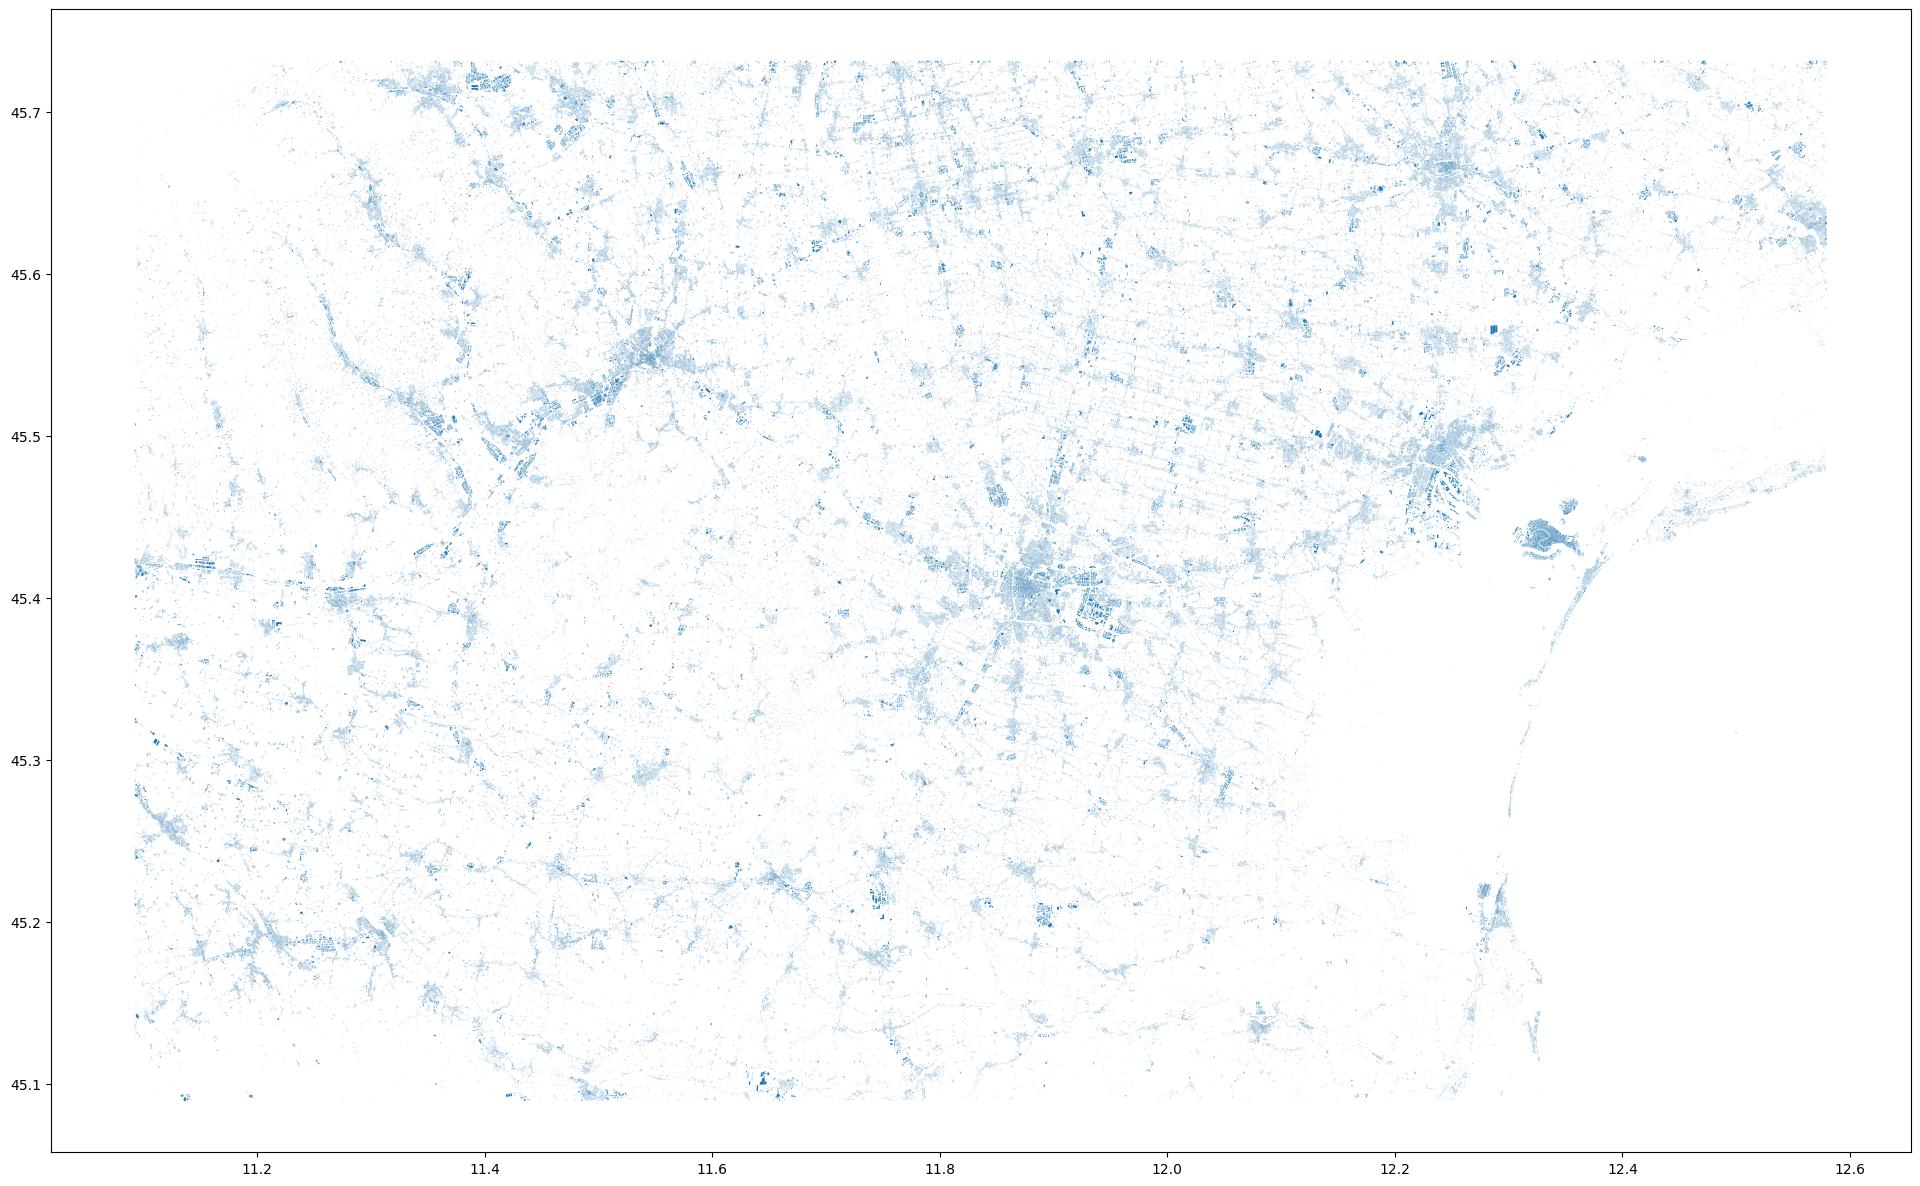

In [24]:
buildings.plot(figsize=(24,24))

Let's take a closer look at the building's data

In [4]:
buildings.head(10)

addr:city addr:country addr:housenumber addr:housename addr:postcode  \
0      None         None             None           None          None   
1      None         None             None           None          None   
2   Venezia         None               11           None         30174   
3      None         None             None           None          None   
4      None         None             None           None          None   
5      None         None             None           None          None   
6      None         None             None           None          None   
7      None         None             None           None          None   
8      None         None             None           None          None   
9    Padova         None               11           None         35123   

  addr:place       addr:street email                                name  \
0       None              None  None                                None   
1       None              None  None                                None   
2       None   Via Sergio Gori  None                    Teatro del Parco   
3       None              None  None                                None   
4       None              None  None                  Tronchetto Parking   
5       None              None  None                 Sede Circoscrizione   
6       None              None  None                   Parcheggio Canove   
7       None              None  None                                IKEA   
8       None              None  None         Centro Commerciale Ipercity   
9       None  Piazza del Santo  None  Basilica di sant'Antonio Di Padova   

           opening_hours  ...           source start_date  \
0                   None  ...             None       None   
1                   None  ...             None       None   
2                   None  ...             None       None   
3                   None  ...             None       None   
4  PH,Mo-Su 00:00-24:00+  ...  survey;Bing WMS       None   
5                   None  ...             None       None   
6                   None  ...             None       None   
7      Mo-Su 09:30-20:30  ...             None       None   
8                   None  ...             None       None   
9                   None  ...              PCN       None   

                               wikipedia        id timestamp version  \
0                                   None  15807159         0      -1   
1                                   None  19905963         0      -1   
2                                   None  19906045         0      -1   
3                                   None  23243893         0      -1   
4                                   None  23243985         0      -1   
5                                   None  23561353         0      -1   
6                                   None  23622959         0      -1   
7                                   None  24317204         0      -1   
8                                   None  25937164         0      -1   
9  it:Basilica di Sant'Antonio di Padova  27198535         0      -1   

                                                tags osm_type  \
0                                               None      way   
1  {"layer":"1","leisure":"sports_centre","sport"...      way   
2  {"layer":"2","name:de":"Parktheater","wheelcha...      way   
3  {"bicycle":"no","highway":"pedestrian","lit":"...      way   
4  {"access":"yes","fee":"yes","parking":"multi-s...      way   
5                                               None      way   
6  {"capacity":"195","capacity:disabled":"yes","f...      way   
7                   {"layer":"1","wheelchair":"yes"}      way   
8                               {"wheelchair":"yes"}      way   
9  {"building:architecture":"romanesque;gothic","...      way   

                                            geometry changeset  
0  POLYGON ((12.23064 45.48267, 12.23072 45.48284...       NaN  
1  POLYGON ((12.25963 45.50042, 12.2599

Now we can insert the buildings into the RDF

In [ ]:
for index, building in buildings.iterrows():
    print('insert buildings into graph')
    break

## Points of Interest (pois)

Let's get the points of interest

In [10]:
pois = osm.get_pois()

C:\Users\ASUS\anaconda3\envs\boring-wozniak\lib\site-packages\pyrosm\pyrosm.py:576: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  gdf = get_poi_data(


And take a look at them

In [21]:
pois.head(10)

timestamp  version         id        lon  \
0          0        0   26859733  12.574270   
1          0        0   26859874  11.602222   
2          0        0   27177395  12.424658   
3          0        0   27179878  12.316942   
4          0        0   27241169  12.378482   
5          0        0   27465310  12.344954   
6          0        0   27486304  12.354618   
7          0        0   49519667  12.340747   
8          0        0   58977448  12.088988   
9          0        0  131959104  11.333440   

                                                tags  changeset        lat  \
0          {"quiet_time":"13:00-15:00, 23:00-07:00"}        0.0  45.479782   
1                              {"created_by":"JOSM"}        0.0  45.517776   
2       {"ferry":"yes","public_transport":"station"}        0.0  45.447628   
3       {"ferry":"yes","public_transport":"station"}        0.0  45.332729   
4  {"cargo":"passengers;vehicle","ferry":"yes","p...        0.0  45.426140   
5  {"ferry":"yes","public_transport":"station","w...        0.0  45.433369   
6  {"ferry":"yes","name:en":"Murano Faro","public...        0.0  45.452625   
7                                               None        0.0  45.436272   
8                    {"created_by":"Potlatch alpha"}        0.0  45.592777   
9  {"brand":"Bogoni","fuel:lpg":"yes","ref:mise":...        0.0  45.152031   

            addr:city addr:country addr:housenumber  ... hospital school  spa  \
0  Cavallino-Treporti         None               47  ...      NaN    NaN  NaN   
1                None         None             None  ...      NaN    NaN  NaN   
2                None         None             None  ...      NaN    NaN  NaN   
3                None         None             None  ...      NaN    NaN  NaN   
4                None         None             None  ...      NaN    NaN  NaN   
5                None         None             None  ...      NaN    NaN  NaN   
6                None         None             None  ...      NaN    NaN  NaN   
7                None         None             4423  ...      NaN    NaN  NaN   
8                None         None             None  ...      NaN    NaN  NaN   
9                None         None             None  ...      NaN    NaN  NaN   

  agrarian kiosk model newsagent water  zoo        poi_type  
0      NaN   NaN   NaN       NaN   NaN  NaN            None  
1      NaN   NaN   NaN       NaN   NaN  NaN            None  
2      NaN   NaN   NaN       NaN   NaN  NaN  ferry_terminal  
3      NaN   NaN   NaN       NaN   NaN  NaN  ferry_terminal  
4      NaN   NaN   NaN       NaN   NaN  NaN  ferry_terminal  
5      NaN   NaN   NaN       NaN   NaN  NaN  ferry_terminal  
6      NaN   NaN   NaN       NaN   NaN  NaN  ferry_terminal  
7      NaN   NaN   NaN       NaN   NaN  NaN            None  
8      NaN   NaN   NaN       NaN   NaN  NaN      restaurant  
9      NaN   NaN   NaN       NaN   NaN  NaN            fuel  

[10 rows x 97 columns]

Now let's plot them

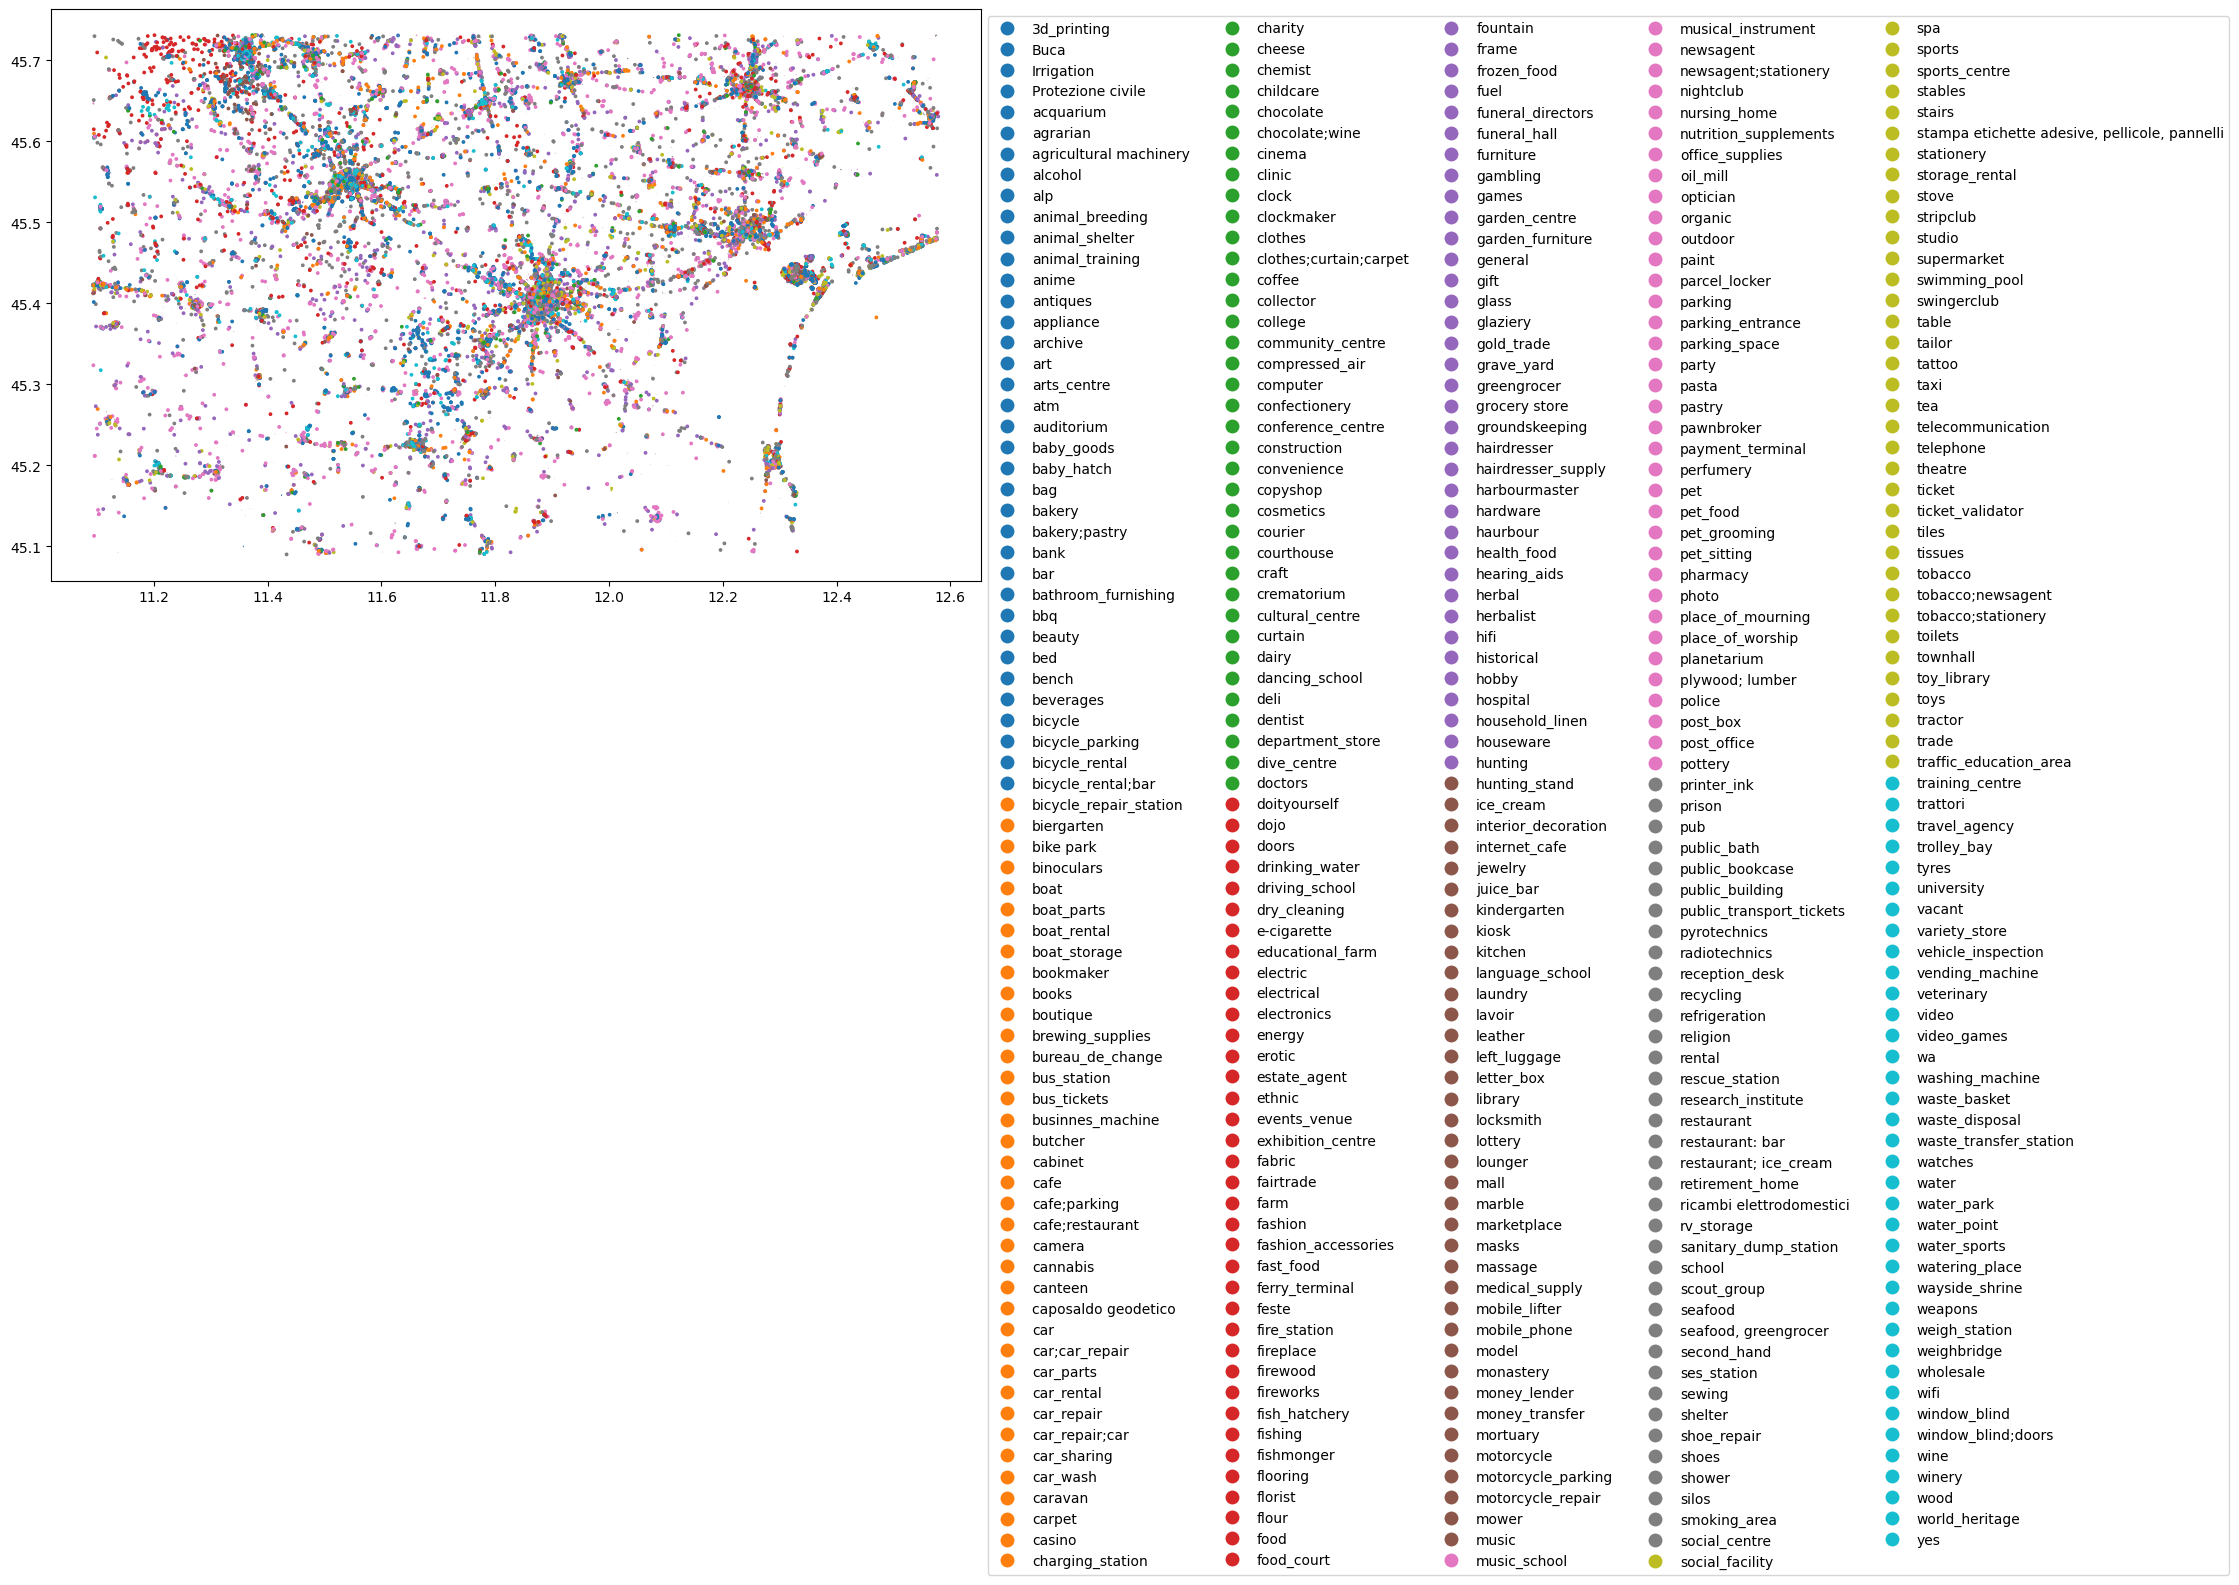

In [12]:
pois["poi_type"] = pois["amenity"]
pois["poi_type"] = pois["poi_type"].fillna(pois["shop"])

ax = pois.plot(column='poi_type', markersize=3, figsize=(12,12), legend=True, legend_kwds=dict(loc='upper left', ncol=5, bbox_to_anchor=(1, 1)))

Now we can insert them into the RDF

In [ ]:
for index, poi in pois.iterrows():
    print('insert pois into graph')
    break